# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## **Please read the instructions carefully before starting the project.** 

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned. 

* Blanks '_______' are provided in the notebook that need to be filled with an appropriate code to get the correct result

* With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space

* Identify the task to be performed correctly and only then proceed to write the required code

* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code"

* Running incomplete code may throw an error

* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors

* Add the results/observations derived from the analysis in the presentation and submit the same in .pdf format

In [ ]:
!pip install nb-black 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.3 MB/s eta 0:00:00
  Created wheel for nb-black: filename=nb_black-1.0.7-py3-none-any.whl size=5298 sha256=aba4ec1a140265b024ffcbe29cd4e5be12dbabe4cb27b21aaa5c934a1ce32896
  Stored in directory: /root/.cache/pip/wheels/a6/5e/1e/a15614d6ea220d070043db3b650d73a8b4938aefd520496c11
Successfully built nb-black
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.

## Importing necessary libraries

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

In [ ]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<IPython.core.display.Javascript object>

## Loading the dataset

## Data Overview

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Displaying the first few rows of the dataset

In [ ]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

### Checking the shape of the dataset

In [ ]:
data.shape ## Complete the code to get the shape of data

(3454, 15)

<IPython.core.display.Javascript object>

### Checking the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

In [ ]:
#creating copy of data
df=data.copy()

<IPython.core.display.Javascript object>

### Statistical summary of the dataset

In [ ]:
data.dtypes ## Complete the code to print the statistical summary of the data

brand_name                object
os                        object
screen_size              float64
4g                        object
5g                        object
main_camera_mp           float64
selfie_camera_mp         float64
int_memory               float64
ram                      float64
battery                  float64
weight                   float64
release_year               int64
days_used                  int64
normalized_used_price    float64
normalized_new_price     float64
dtype: object

<IPython.core.display.Javascript object>

### Checking for duplicate values

In [ ]:
data.isnull().sum()## Complete the code to check duplicate entries in the data

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

### Checking for missing values

In [ ]:
data.isnull().sum() ## Complete the code to check duplicate entries in the data

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

<IPython.core.display.Javascript object>

In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

**`normalized_used_price`**

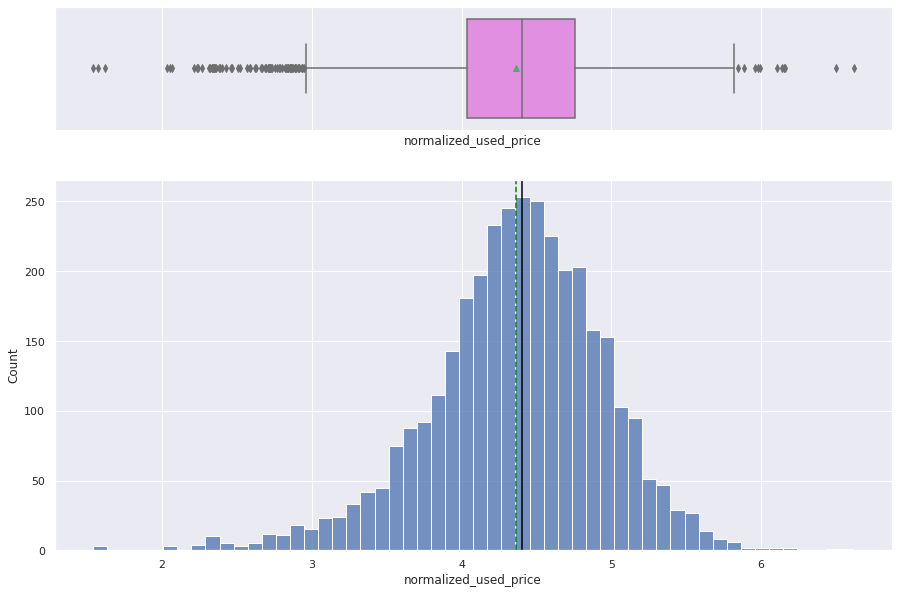

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, "normalized_used_price")

**`normalized_new_price`**

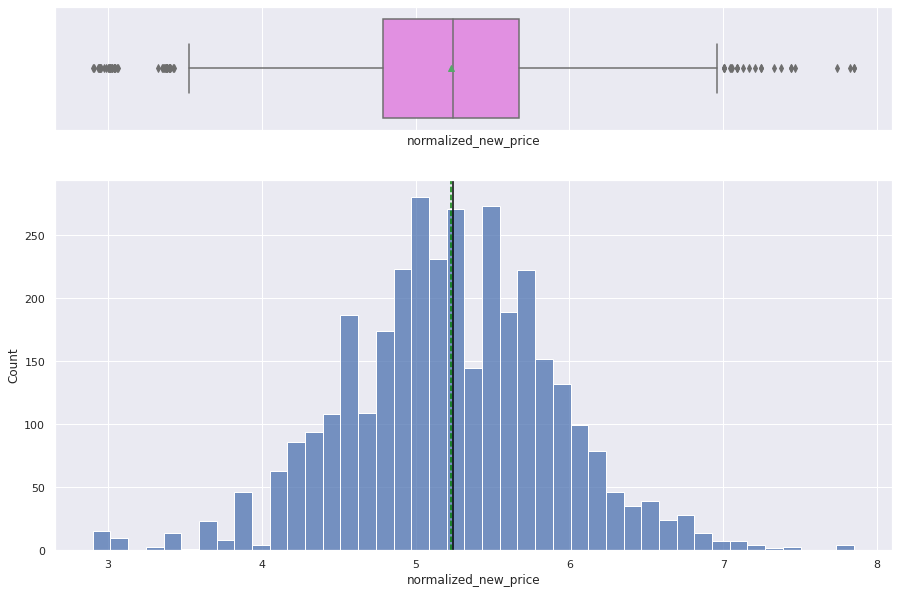

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, "normalized_new_price")  ## Complete the code to create histogram_boxplot for 'normalized_new_price'

**`screen_size`**

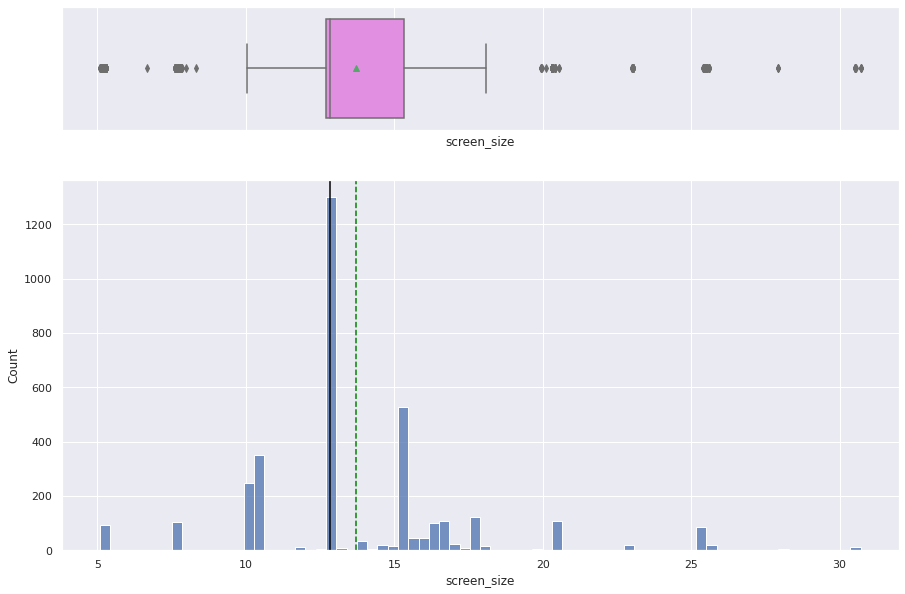

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df,"screen_size")  ## Complete the code to create histogram_boxplot for 'screen_size'

**`main_camera_mp`**

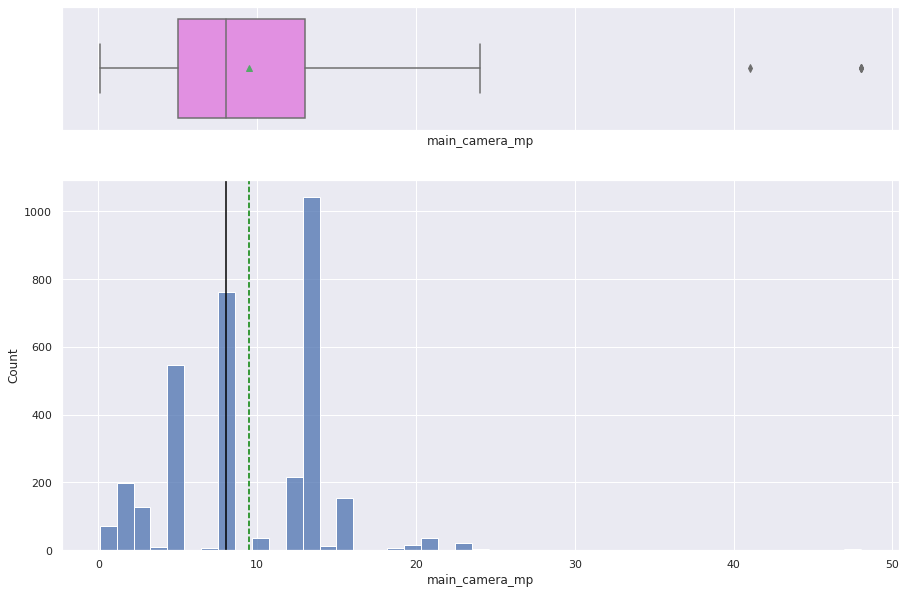

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df,"main_camera_mp")  ## Complete the code to create histogram_boxplot for 'main_camera_mp'

**`selfie_camera_mp`**

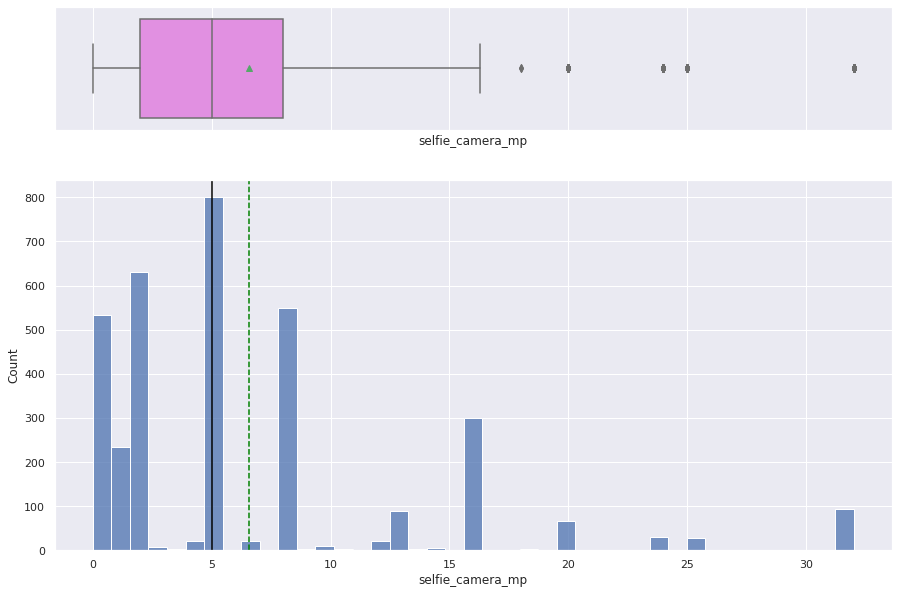

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df,"selfie_camera_mp")  ## Complete the code to create histogram_boxplot for 'selfie_camera_mp'

**`int_memory`**

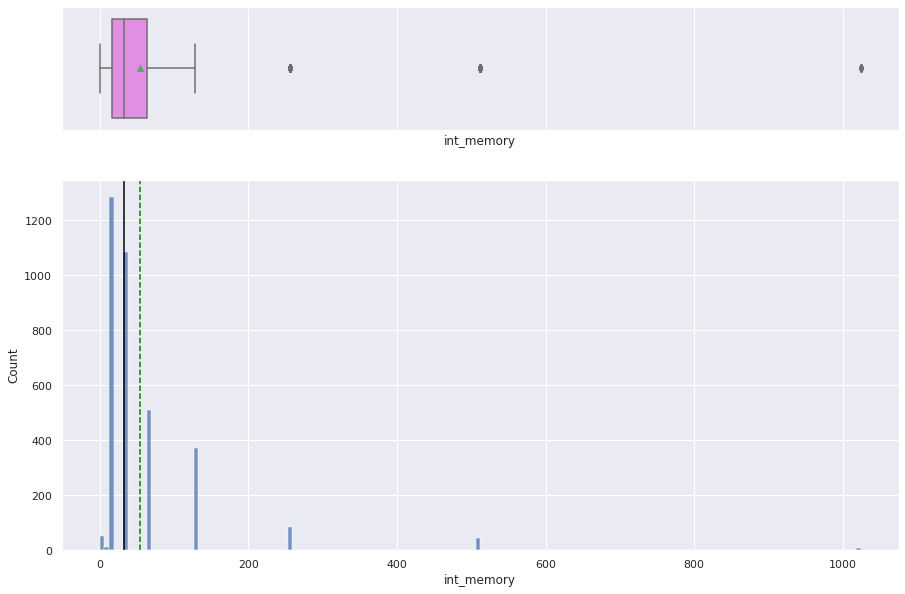

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df,"int_memory")  ## Complete the code to create histogram_boxplot for 'int_memory'

**`ram`**

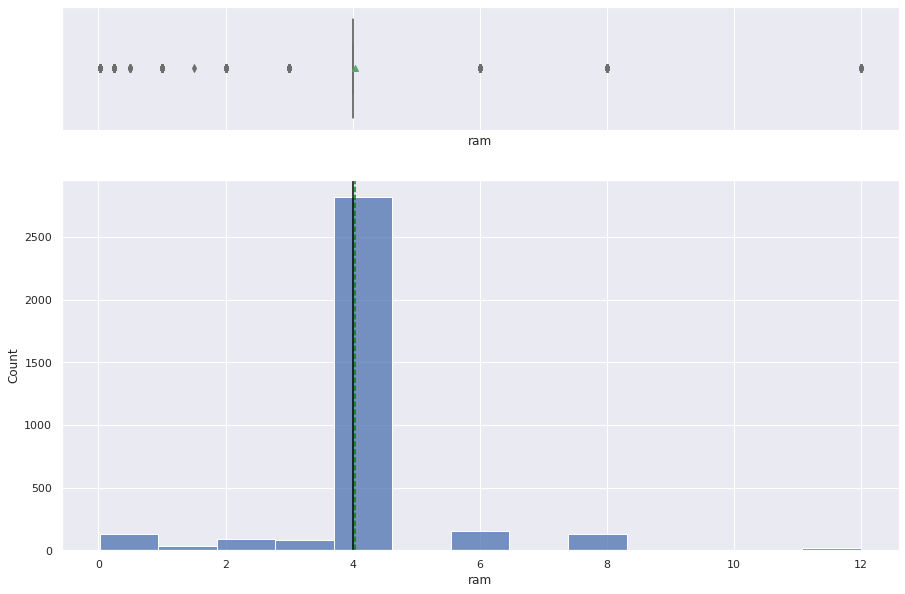

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df,"ram")  ## Complete the code to create histogram_boxplot for 'ram'

**`weight`**

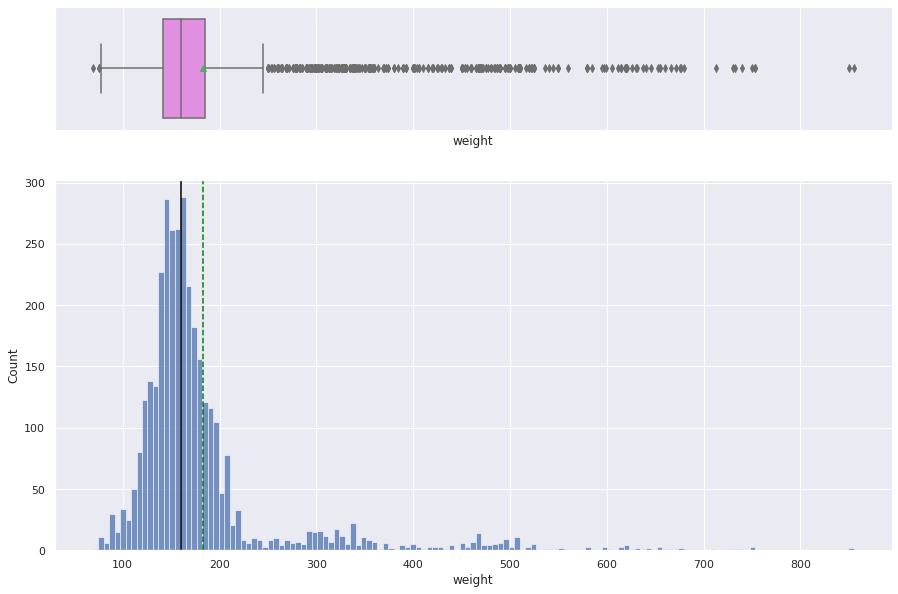

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df,"weight")  ## Complete the code to create histogram_boxplot for 'weight'

**`battery`**

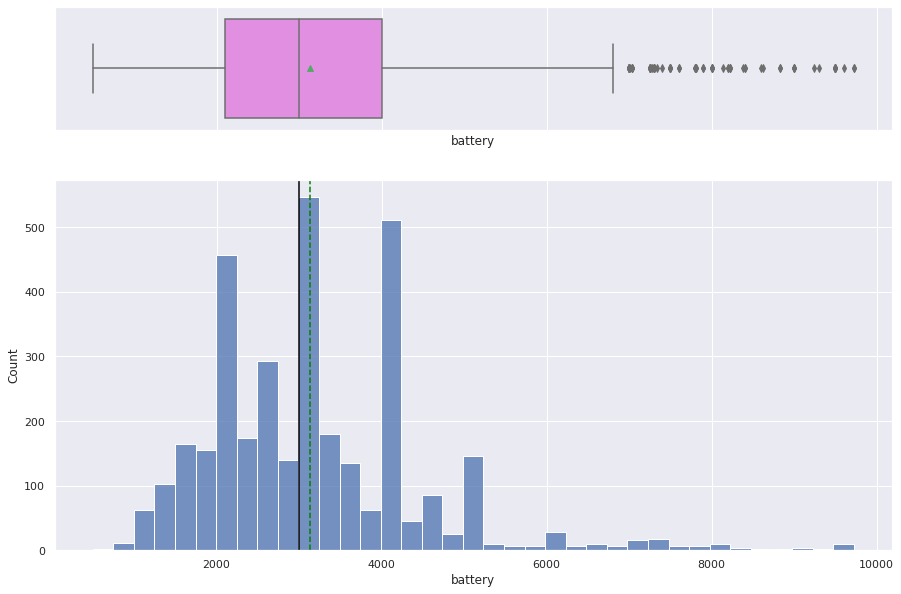

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df,"battery")  ## Complete the code to create histogram_boxplot for 'battery'

**`days_used`**

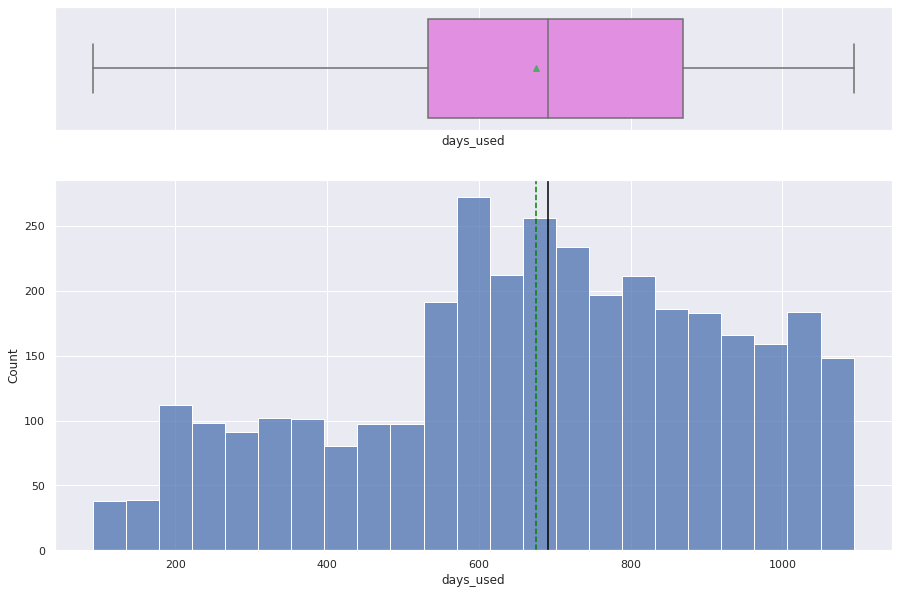

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df,"days_used")  ## Complete the code to create histogram_boxplot for 'days_used'

**`brand_name`**

In [ ]:
labeled_barplot(df, "brand_name", perc=True, n=15)

NameError: ignored

**`os`**

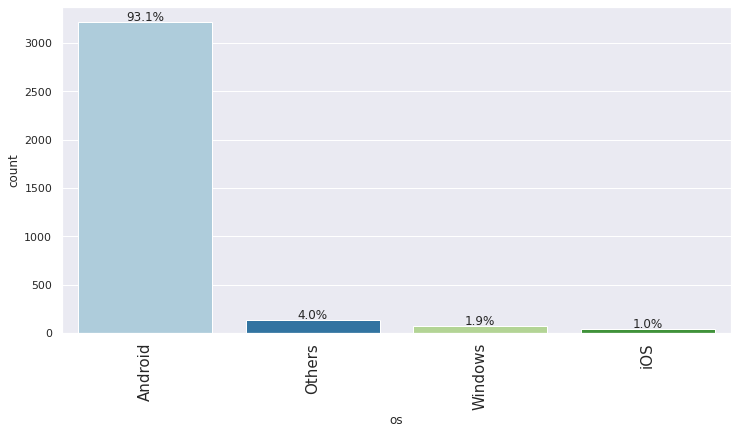

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, "os", perc=True, n=10) ## Complete the code to create labeled_barplot for 'os'

**`4g`**

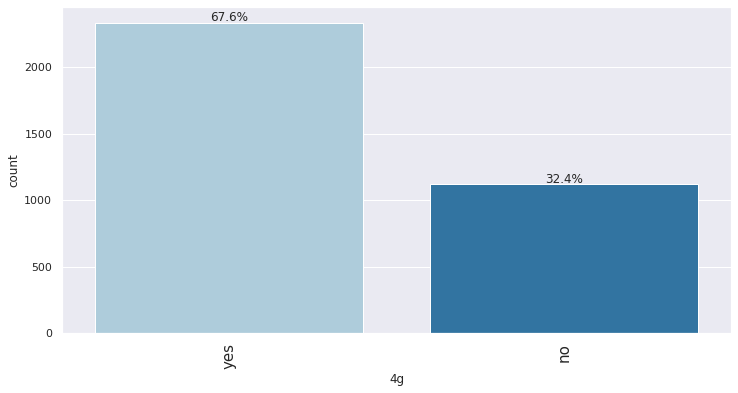

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, "4g", perc=True, n=10) ## Complete the code to create labeled_barplot for '4g'

**`5g`**

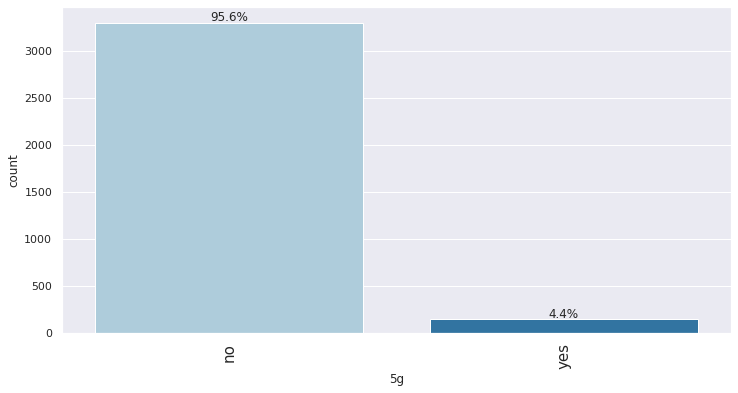

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, "5g", perc=True, n=10) ## Complete the code to create labeled_barplot for '5g'

**`release_year`**

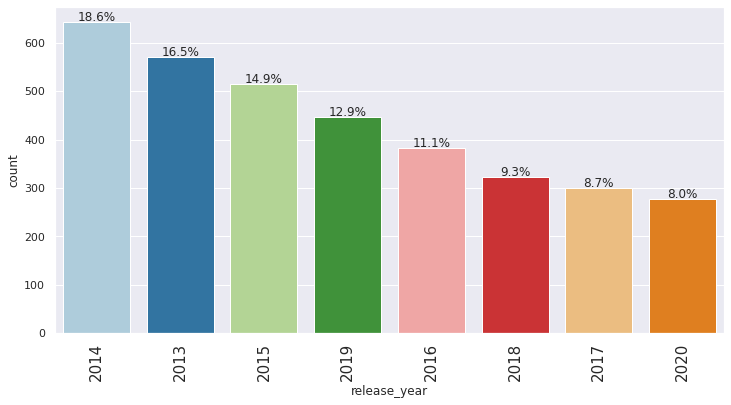

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, "release_year", perc=True, n=10) ## Complete the code to create labeled_barplot for 'release_year'

### Bivariate Analysis

**Correlation Check**

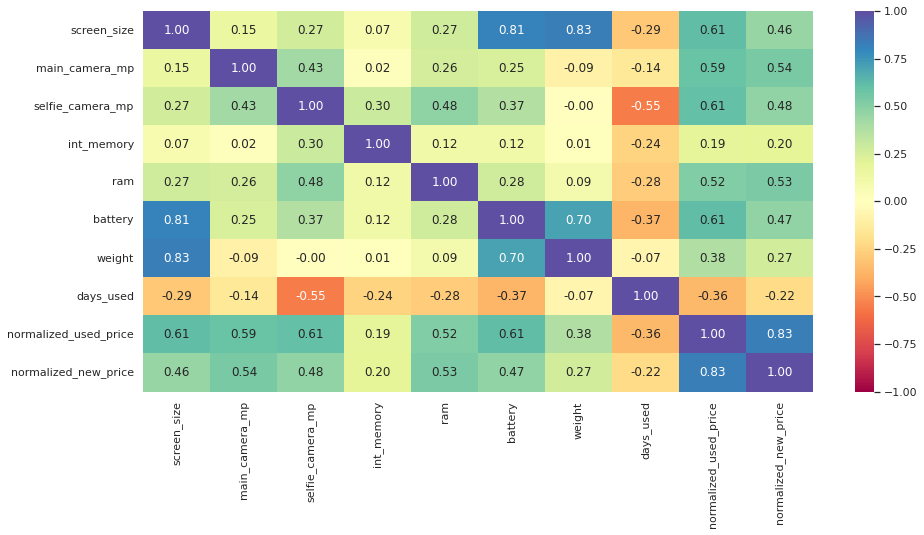

<IPython.core.display.Javascript object>

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

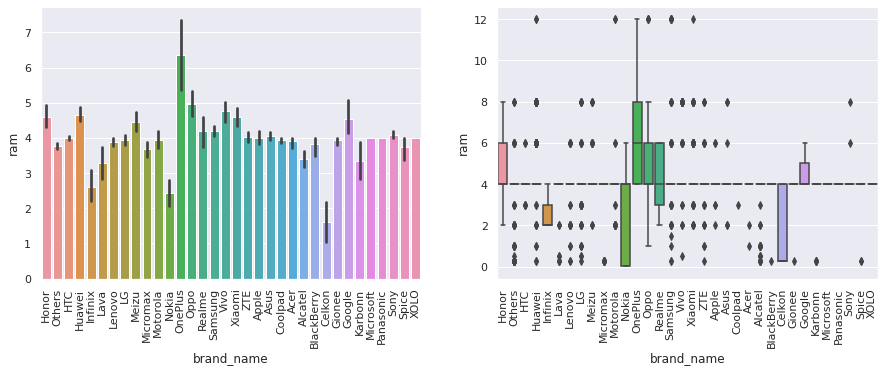

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, y="ram", x="brand_name")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="ram", x="brand_name")
plt.xticks(rotation=90)

plt.show()

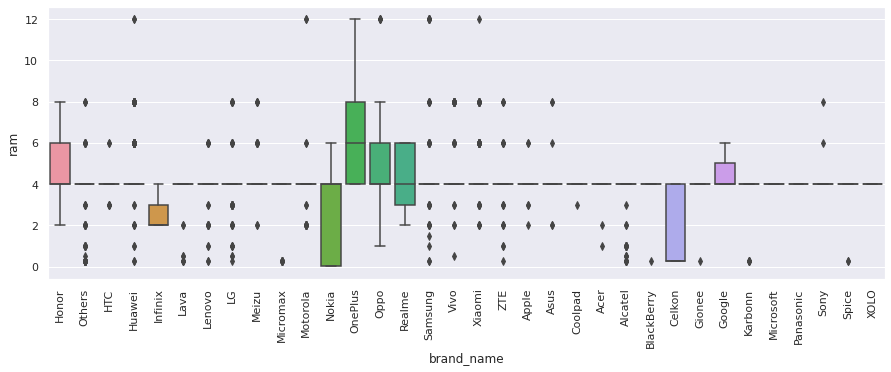

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [ ]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

<IPython.core.display.Javascript object>

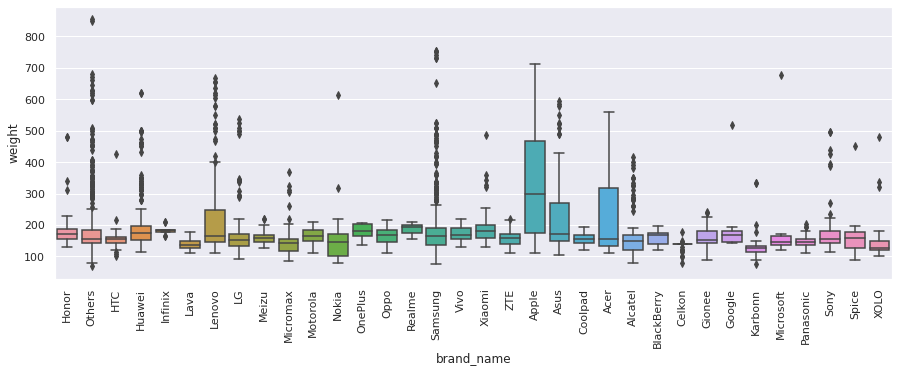

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="weight") ## Complete the code to create a boxplot for 'brand_name' and 'weight'
plt.xticks(rotation=90)
plt.show()

**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [ ]:
# fill missing columns with the column median
col_to_fill = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

df[col_to_fill] = df[col_to_fill].apply(lambda x: x.fillna(x.median()), axis=0)

<IPython.core.display.Javascript object>

In [ ]:
# checking the number of missing values
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

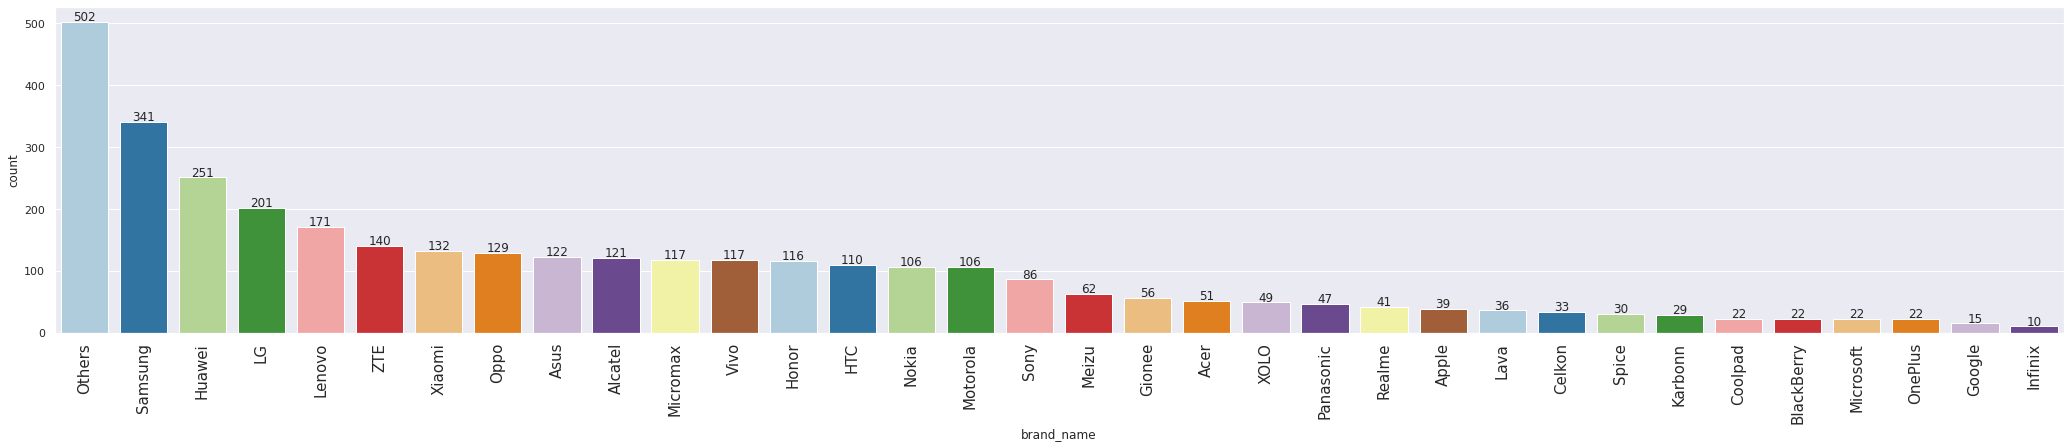

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df,"brand_name") ## Complete the code to create labeled_barplot for 'brand_name' in large screen dataframe

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [ ]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

<IPython.core.display.Javascript object>

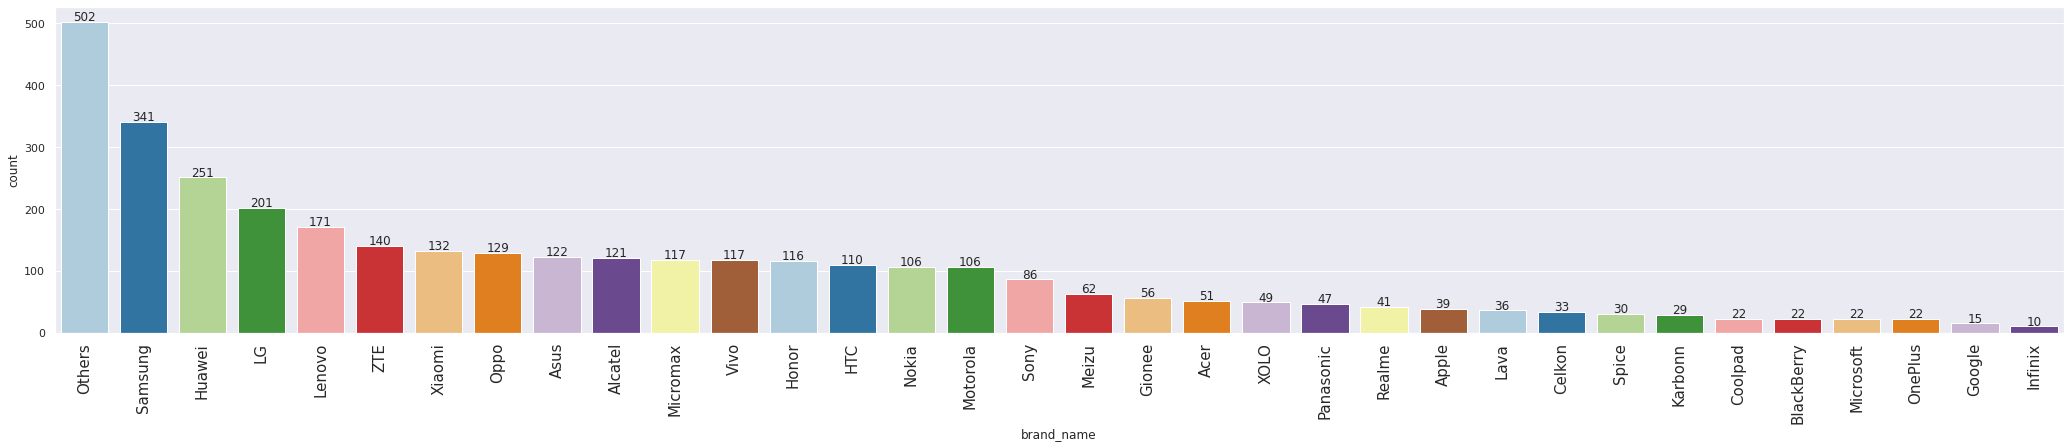

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df,"brand_name") ## Complete the code to create labeled_barplot for 'brand_name' in high selfie camera dataframe

**Let's do a similar analysis for rear cameras.**

- Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [ ]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

<IPython.core.display.Javascript object>

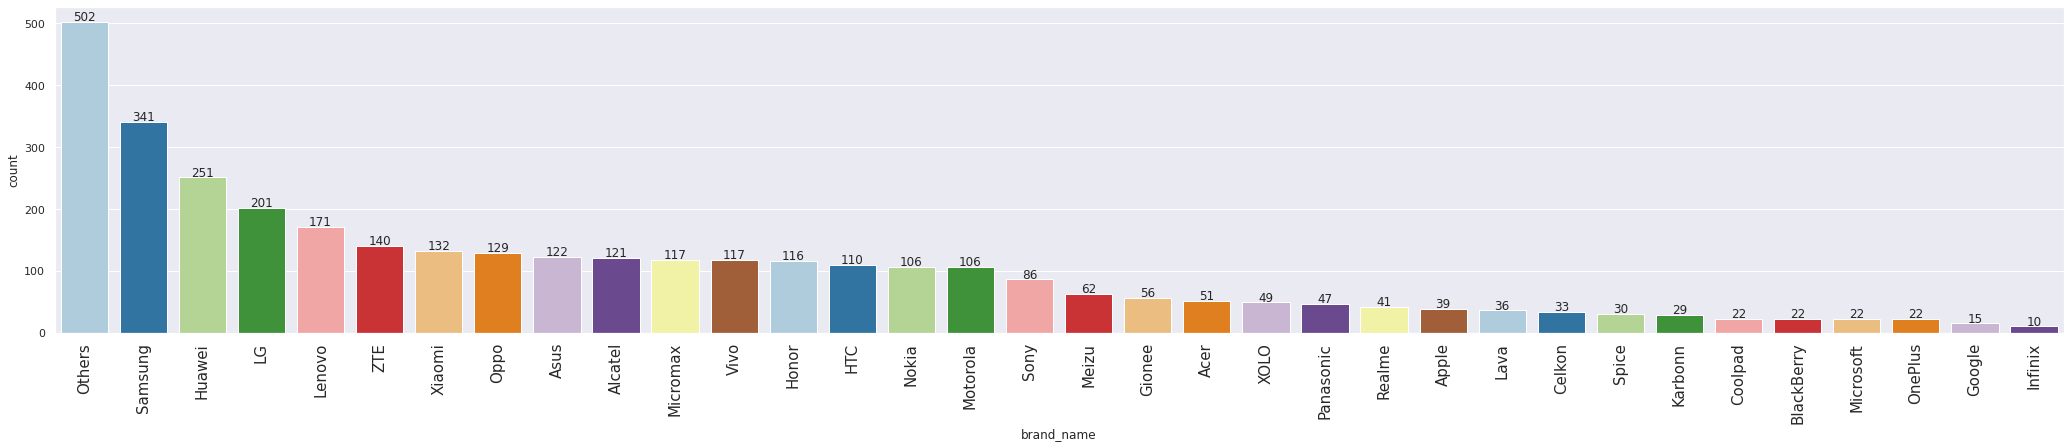

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df,"brand_name") ## Complete the code to create labeled_barplot for 'brand_name' in high main camera dataframe

**Let's see how the price of used devices varies across the years.**

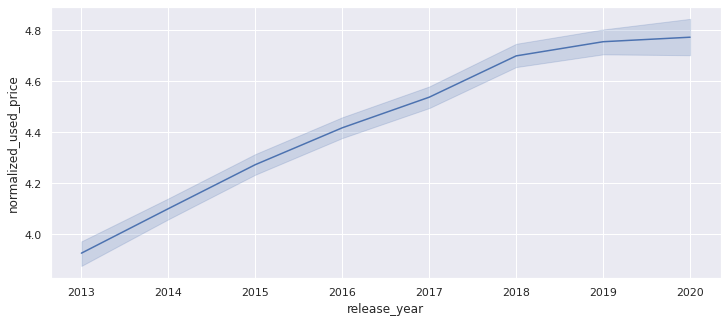

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df,x="release_year", y="normalized_used_price") ## Complete the code to create a lineplot for release year and used price
plt.show()

**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

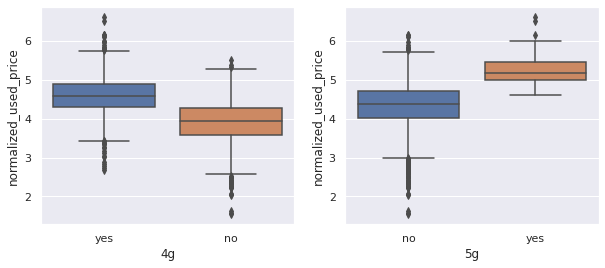

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

## Data Preprocessing

### Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [ ]:
# let's create a copy of the data
df1 = df.copy()

<IPython.core.display.Javascript object>

In [ ]:
# checking for missing values
df1.isnull().sum() ## Complete the code to check missing values in all the columns

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["main_camera_mp","selfie_camera_mp","ram","int_memory","battery","weight"])[col].transform("median")
    )   ## Complete the code to impute missing values in cols_impute with median by grouping the data on release year and brand name 

# checking for missing values
df1.isnull().sum() ## Complete the code to check missing values after imputing the above columns

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["main_camera_mp","selfie_camera_mp","battery","weight"])[col].transform("median")
    ) ## Complete the code to impute the missing values in cols_impute with median by grouping the data on brand name

# checking for missing values
df1.isnull().sum() ## Complete the code to check missing values after imputing the above columns

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

- We will fill the remaining missing values in the `main_camera_mp` column by the column median.

In [ ]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median()) ## Complete the code to impute the data with median

# checking for missing values
df1.isnull().sum() ## Complete the code to check missing values after imputing the above columns

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

### Feature Engineering



- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [ ]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

<IPython.core.display.Javascript object>

### Outlier Check



- Let's check for outliers in the data.

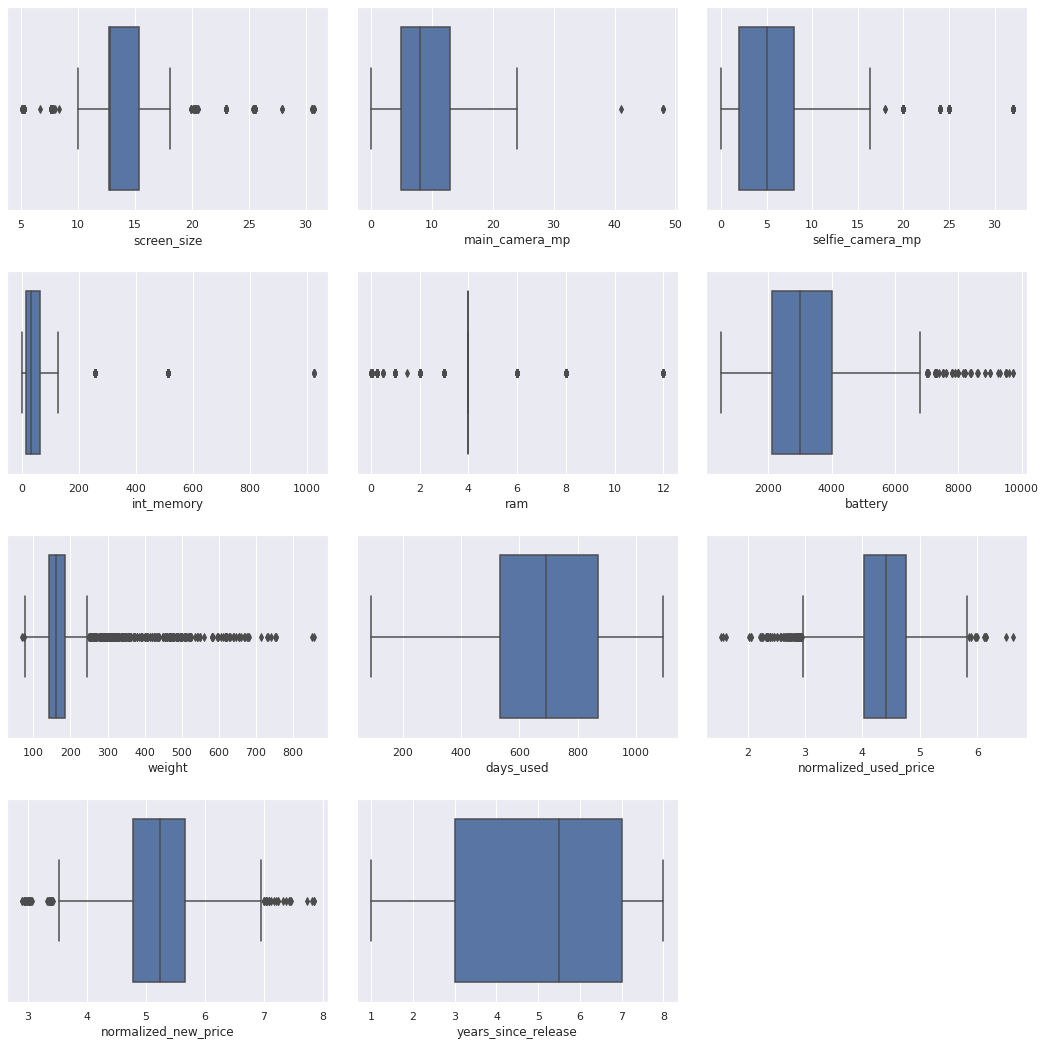

<IPython.core.display.Javascript object>

In [ ]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [ ]:
## Complete the code to define the dependent and independent variables
# define dependent and independent variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

<IPython.core.display.Javascript object>

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<IPython.core.display.Javascript object>

In [ ]:
# creating dummy variables

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# to ensure all variables are of float type
X = X.astype(float)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127.0,4.715100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325.0,5.519018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162.0,5.884631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345.0,5.630961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293.0,4.947837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<IPython.core.display.Javascript object>

In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) ## Complete the code to split the data into train and test in specified ratio

<IPython.core.display.Javascript object>

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

## Model Building - Linear Regression


In [ ]:
# fitting a linear model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.8
Date:                   Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                           06:06:08   Log-Likelihood:                 124.22
No. Observations:                   2417   AIC:                            -150.4
Df Residuals:                       2368   BIC:                             133.3
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

### Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [ ]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229849,0.180336,0.844933,0.841723,4.326958


<IPython.core.display.Javascript object>

In [ ]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238306,0.184064,0.842547,0.834731,4.488006


<IPython.core.display.Javascript object>

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY



- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [ ]:
#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [ ]:
checking_vif(x_train)  ## Complete the code to check VIF on train data

,feature,VIF
0,const,228.603553
1,screen_size,7.680705
2,main_camera_mp,2.136597
3,selfie_camera_mp,2.808416
4,int_memory,1.361465
5,ram,2.258272
6,battery,4.073582
7,weight,6.380746
8,days_used,2.669393
9,normalized_new_price,3.121941


<IPython.core.display.Javascript object>

### Removing Multicollinearity (if needed)



To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [ ]:
col_list = [
    "screen_size",
    "years_since_release"
]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,years_since_release,0.839880,0.233612
1,screen_size,0.838448,0.234655


<IPython.core.display.Javascript object>

In [ ]:
col_to_drop =  "years_since_release" ## Complete the code to specify the column to drop
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] ## Complete the code to specify the train data from which to drop the column specified
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)] ## Complete the code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  years_since_release


,feature,VIF
0,const,222.865003
1,screen_size,7.417394
2,main_camera_mp,2.130647
3,selfie_camera_mp,2.501889
4,int_memory,1.346202
5,ram,2.256586
6,battery,3.948094
7,weight,6.148546
8,days_used,1.921389
9,normalized_new_price,2.924257


<IPython.core.display.Javascript object>

### Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
# initial list of columns
predictors = x_train.copy()  ## Complete the code to check for p-values on the right dataset
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Realme', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


<IPython.core.display.Javascript object>

In [ ]:
x_train2 = x_train[["const"] + selected_features]
x_test2 = x_test[["const"] + selected_features]

<IPython.core.display.Javascript object>

In [ ]:
# print model summary
olsmod2 = sm.OLS(y_train, x_train2).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     918.5
Date:                   Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                           06:29:28   Log-Likelihood:                 106.20
No. Observations:                   2417   AIC:                            -182.4
Df Residuals:                       2402   BIC:                            -95.55
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(x_train2) ## Complete the code to check performance on train data
olsmodel2_train_perf

Training Performance



TypeError: ignored

<IPython.core.display.Javascript object>

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression('_______') ## Complete the code to check performance on test data
olsmodel2_test_perf

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE



- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.855637,0.231851
1525,4.448399,4.627645,-0.179246
1128,4.315353,4.281712,0.033640
3003,4.282068,4.238675,0.043393
2907,4.456438,4.474552,-0.018114


<IPython.core.display.Javascript object>

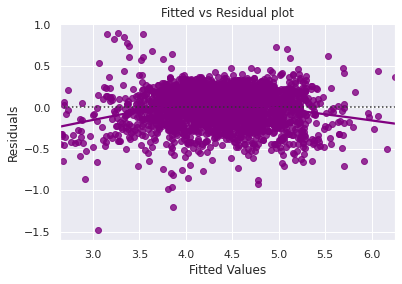

<IPython.core.display.Javascript object>

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

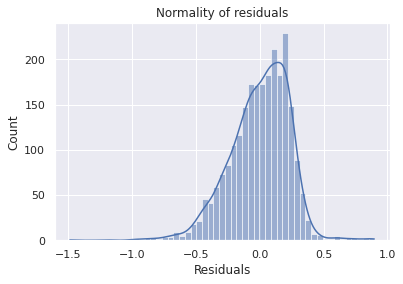

<IPython.core.display.Javascript object>

In [ ]:
sns.histplot(data=df_pred,  x="Residuals", kde=True) ## Complete the code to plot the distribution of residuals
plt.title("Normality of residuals")
plt.show()

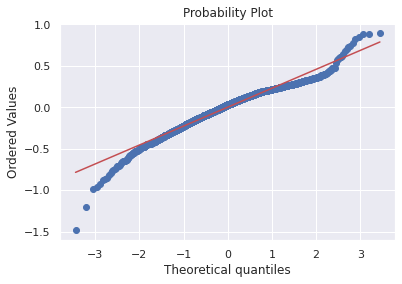

<IPython.core.display.Javascript object>

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [ ]:
stats.shapiro(df_pred["Residuals"]) ## Complete the code to apply the Shapiro-Wilks test

ShapiroResult(statistic=0.9692835807800293, pvalue=2.4805272994260964e-22)

<IPython.core.display.Javascript object>

### TEST FOR HOMOSCEDASTICITY



- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2)
lzip(name, test)

[('F statistic', 1.0491450075063868), ('p-value', 0.20369231172348423)]

<IPython.core.display.Javascript object>

## Final Model Summary

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train2).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     918.5
Date:                   Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                           07:03:39   Log-Likelihood:                 106.20
No. Observations:                   2417   AIC:                            -182.4
Df Residuals:                       2402   BIC:                            -95.55
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmodel_final, x_train2, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231569,0.181583,0.842603,0.841554,4.35553


<IPython.core.display.Javascript object>

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmodel_final, x_test2, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236591,0.182584,0.844806,0.842371,4.445379


<IPython.core.display.Javascript object>

##  Actionable Insights and Recommendations

bold text---------

Actionable Insights and Recommendations
normalized_new_price has a strong positive correlation with used price. Hence the higher the price of the new device the higher the price of the same device in refurbished market.

1 unit increase in weight of the device leads to increase in the price of the refurbished device by 0.2612 euros

screen_size, main_camera_mp, selfie_camera_mp, int_memory, ram, normalized_new_price, weight_log ,4G have positive coefficients. So, as they increase, the price of used devices also increases.

Operating systems of devices other than Android, iOS, and windows have negative coefficients. Hence as they increase, the price of used devices decrease.

In summary therefore, the factors that significantly influence the price of refurbished devices in the market are as listed as below; - Size of the screen of the devices - Main camera mega pixels - selfie camera pixels - internal memory - RAM of the devices - Price of the similar new device - weight of the devices - Whether the device is a 4G or not - Operating system

INSIGHTS
Newly released phones have high used price, which makes sense because the newer the phone, the higher the new price hence used price would be affected and the older the phone, the lower the used price. since most customers want phones in demand.

release_year, days_used, new_price, brand_name_Gionee, whether 4g or 5g seem to be affect the used price. this is understandable the longer the phone is used, we cant determine its originality and its wholeness hence a decrease in used price which negatively impacts the amount it could be sold for used. 5g comes more with new phones, hence it would also shoot up in a high used price since its new.

Phones with 4g and Gionee brand phones have lower the used price. they seem to not be a demand for customers and should probably be discontinued.

RECOMMENDATIONS
We can use the model to make predictions of the price of used phone. Newly released phones should also be focused on as they have a high resale price. 5g network enabled phones have high resale price and should be focused on rather than those with less 4g phones an example is Gionee phones. i recommend discontinuation of Gionee phones.

Future data collections need to be done on the age of customers purchasing products, since age could be a major drive. millenial customers may tend to want a 5g or a newer version.

Future data collection on income could also be done to know what more high income customer want.

Key take way:
Since retailers usually run checks repair used phones to meet a certain standard in the refurbished market, factors like number of days the device has been used, battery and years since release of the device do not show significant impact on the price of the refurbished device, hence Recell should not worry about those factors a lot. As long as the device is repaired, it will get market.

The model is able to explain ~83% of the variation in the data, which is very good.

The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

The Mean Absolute Percentage Error(MAPE) on the test set suggests we can predict the used devices prices within 4.6% error which is good because it is a low value

Hence, we can conclude the model olsmod2 is good for prediction as well as inference purposes.

Conclusions
Transforming the new price and used price for a phone from an assume log-normal distribution to a normal distribution complicates the interpretation of the model's results:

The new price of a phone would need to be logarithmically transformed prior to being fed into the model
Due to the nature of a log-normal distribution, the model would need inputs for all four variables prior to determining how much changing one variable would effect the used_log value predicted by the model
The used_log predicted by the model would need to be transformed back into used_price to be interpreted as an amount in euros
However, some conclusions can be drawn from parameters above:

Decreasing the release_year and increasing the number of days_used are shown to decrease the predicted used price of a phone
Increasing the new price of a phone (and the resulting new_log value fed into the model) is shown to increase the predicted used price of that phone
Having a phone with 5g will increase a phone's used price predicted by the model
Having a phone of a brand from either South Korea or Taiwan will increase a phone's used price predicted by the model

Actionable Insights and Recommendations
Number of days used actually has negligible impact on the normalized used price. Even after using the device for 365 days, the price decreases a negligible amount (0.000081 coef * 365 = 0.000029 euros lower). This means that regardless of how much a device is used, the used price of the device will be constant. This likely explains why companies like Apple have fixed return values for devices of the same model - usage of the device has no impact on whether or not they are able to sell the device.
Higher weight appears to increase the normalized used price of a device.
RAM higher than 4.0 has a positive impact on the normalized used price, compared to RAM equal to 4.0.
Internal memory, main camera mp, selfie camera mp and weight all have positive coefficients. So, as they increase, the used price also increases.
The normalized new price also has a positive coefficient. This means that reviewing the new price of the device is a good way to estimate the tier that the used price of the device would be.
If ReCell wants to make the most business, they should focus on selling devices with high memory, camera mp, and RAM. Prior usage of the device does not matter, so ReCell can prioritize selling these devices regardless of how much prior usage was.